### Table of Contents
<li><a href="#Assessing Data">Assessing Data</a></li>
<li><a href="#Cleaning Data">Cleaning Data</a></li>
<li><a href="#Filter, Drop Nulls, Dedupe">Filter, Drop Nulls, Dedupe</a></li>
<li><a href="#Inspecting Data Types">Inspecting Data Types</a></li>
<li><a href="#Exploring with Visuals">Exploring with Visuals</a></li>
<li><a href="#Conclusions & Visuals">Conclusions & Visuals</a></li>
<li><a href="#Results with Merged Dataset">Results with Merged Dataset</a></li>


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_08 = pd.read_csv('all_alpha_08.csv')

In [5]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


 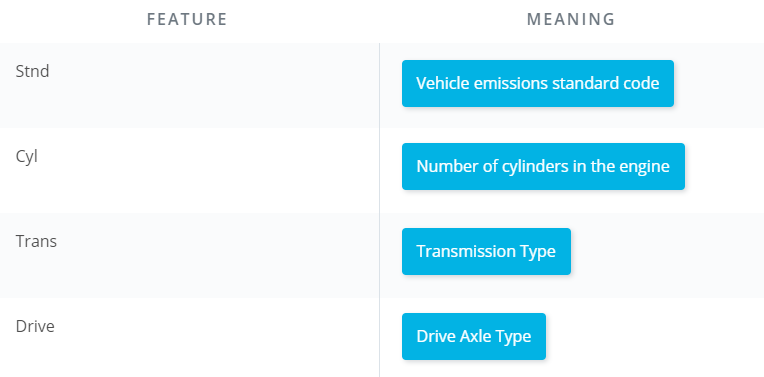

In [6]:
df_18 = pd.read_csv('all_alpha_18.csv')

In [7]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


- ***Which car model is likely to be a smart way car?***
- ***Does the car fuel affect it to be a smart way car?***
- ***What fuel type that makes air pollution score higher?***
- ***What fuel type that makes greenhouse gas score higher?***
- ***What are the values of air pollution score and greenhouse score that in it the car considered a smart way car?***

***We can see here HONDA Accord model is most likely to be a smart way car*** 

> **Why HONDA Accord is most likely to be a smart way car?**

<a id='Assessing Data'></a>

### Assessing Data


In [8]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [9]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [10]:
df_08.duplicated().sum()

25

In [11]:
df_18.duplicated().sum()

0

In [12]:
df_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [13]:
df_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [14]:
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [15]:
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [16]:
df_08.nunique(dropna = True)

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [17]:
df_18.nunique(dropna = True)

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [18]:
df_08.Fuel.value_counts()

Gasoline       2318
ethanol/gas      72
diesel           11
CNG               2
ethanol           1
Name: Fuel, dtype: int64

In [19]:
df_18.Fuel.value_counts()

Gasoline                1492
Ethanol/Gas               55
Diesel                    38
Gasoline/Electricity      24
Electricity                2
Name: Fuel, dtype: int64

<a id='Cleaning Data'></a>

### Cleaning Data

In [20]:
df_08.drop(columns=['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], inplace=True)
df_18.drop(columns=['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], inplace=True)

In [21]:
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [22]:
df_18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [23]:
df_08.rename(columns={'Sales Area': 'cert_region'}, inplace=True)

In [24]:
for columnName in df_08.columns.to_list():
    df_08.rename(columns={columnName: columnName.lower().replace(' ','_')}, inplace=True)
for columnName in df_18.columns.to_list():
    df_18.rename(columns={columnName: columnName.lower().replace(' ','_')}, inplace=True)

    

In [25]:
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [26]:
df_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [27]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [28]:
# confirm column labels for 2008 and 2018 datasets are identical
# make sure they're all identical like this

(df_08.columns == df_18.columns).all()

True

In [29]:
# save new datasets for next section
df_08.to_csv('data_08_v1.csv', index=False)
df_18.to_csv('data_18_v1.csv', index=False)

<a id='Filter, Drop Nulls, Dedupe'></a>

### Filter, Drop Nulls, Dedupe


In [30]:
import pandas as pd
df_08 = pd.read_csv('data_08_v1.csv')
df_18 = pd.read_csv('data_18_v1.csv')

In [31]:
# view dimensions of dataset
df_08.shape

(2404, 14)

In [32]:
# view dimensions of dataset
df_18.shape

(1611, 14)

In [33]:
# filter datasets for rows following California standards
df_08 = df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [34]:
df_08.cert_region.unique()

array(['CA'], dtype=object)

In [35]:
df_18.cert_region.unique()

array(['CA'], dtype=object)

In [36]:
# drop certification region columns form both datasets
df_08.drop(columns=['cert_region'], inplace=True)
df_18.drop(columns=['cert_region'], inplace=True)

In [37]:
df_08.shape

(1084, 13)

In [38]:
df_18.shape

(798, 13)

In [39]:
# Missing Values
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [40]:
df_18.isna().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [41]:
df_08.dropna(how = 'any', inplace=True)
df_18.dropna(how = 'any', inplace=True)

In [42]:
df_08.isnull().sum().any()

False

In [43]:
df_18.isnull().sum().any()

False

In [44]:
# print number of duplicates in 2008 and 2018 datasets
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

23
3


In [45]:
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [46]:
# print number of duplicates in 2008 and 2018 datasets
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

0
0


In [47]:
# save progress for the next section
df_08.to_csv('data_08_v2.csv', index=False)
df_18.to_csv('data_18_v2.csv', index=False)

<a id='Inspecting Data Types'></a>

### Inspecting Data Types


In [48]:
df_08 = pd.read_csv('data_08_v2.csv')
df_18 = pd.read_csv('data_18_v2.csv')

In [49]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
1,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
2,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
3,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
4,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [50]:
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
2,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
3,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
4,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No


In [51]:
df_08.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [52]:
df_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

- **cyl column dtype need to be changed to int in both datasets**
- **air pollution score need to be changed to floats in both datasets**
- **city_mpdg, hwy_mpg, and cmb_mpg columns dtypes need to be changed to floats in both datasets**
- **greenhouse_gas_score dtype need to be changed to int in df_08 dataset**

#### Fixing Data Types
**Fixing cyl data type**


In [53]:
df_08.cyl.value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [54]:
df_08.cyl = df_08.cyl.apply(lambda x:x.replace('cyl', ''))
df_08.cyl = df_08.cyl.apply(lambda x:x.replace('(', ''))
df_08.cyl = df_08.cyl.apply(lambda x:x.replace(')', '').strip())
df_08.cyl = df_08.cyl.astype('int64')

In [55]:
df_08.cyl.value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [56]:
df_18.cyl = df_18.cyl.astype('int64')

In [57]:
type(df_18.cyl[0])

numpy.int64

In [58]:
# save progress for the next section
df_08.to_csv('data_08_v3.csv', index=False)
df_18.to_csv('data_18_v3.csv', index=False)

**Fixing air pollution data type**

In [59]:
df_08 = pd.read_csv('data_08_v3.csv')
df_18 = pd.read_csv('data_18_v3.csv')

In [60]:
df_08.air_pollution_score.value_counts()

6      500
7      398
9.5     80
9        7
6/4      1
Name: air_pollution_score, dtype: int64

In [61]:
df_18.air_pollution_score.value_counts()

3    372
5    187
7    139
1     89
6      7
Name: air_pollution_score, dtype: int64

In [62]:
pd.to_numeric(df_08.air_pollution_score, errors = 'coerce').isnull().sum()
# this convert 6/4 to Nan value put this is not right, you want the numeric value of 6/4

1

In [63]:
#pd.to_numeric(df_18.air_pollution_score,downcast = 'float', errors = 'coerce')
df_18.air_pollution_score = df_18.air_pollution_score.astype('float64')
type(df_18.air_pollution_score[0])

numpy.float64

In [64]:
df_08[df_08.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


> **look to the fuel column, If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type.**
 

> **Ohh... so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values**

In [65]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [66]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3.0,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7.0,27/70,31/75,29/72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7.0,27/66,31/68,28/67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3.0,25/62,29/68,27/64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5.0,14/18,20/28,16/22,4,No
195,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5.0,12/18,16/24,14/20,4,No
196,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5.0,12/17,15/22,13/19,3,No
197,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3.0,12/16,17/23,14/19,3,No
212,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3.0,12/16,17/23,14/19,3,No
214,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3.0,11/16,15/22,12/18,3,No


In [67]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [68]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [69]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [70]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values after the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [71]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [72]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [73]:
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [74]:
df_08.shape

(987, 13)

In [75]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

In [76]:
hb_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [77]:
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for c in split_columns:
    df1[c] = df1[c].apply(lambda x:x.split('/')[0])
    df2[c] = df2[c].apply(lambda x:x.split('/')[1])

In [78]:
df1.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3.0,28,34,30,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7.0,27,31,29,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7.0,27,31,28,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3.0,25,29,27,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5.0,14,20,16,4,No


In [79]:
df2.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Electricity,small car,3.0,66,78,71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Electricity,small car,7.0,70,75,72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Electricity,small car,7.0,66,68,67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Electricity,large car,3.0,62,68,64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Gas,large car,5.0,18,28,22,4,No


In [80]:
new_rows = df1.append(df2)
new_rows.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3.0,28,34,30,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7.0,27,31,29,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7.0,27,31,28,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3.0,25,29,27,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5.0,14,20,16,4,No


In [81]:
df_18.drop(hb_18.index, inplace=True)

In [82]:
df_18 = df_18.append(new_rows, ignore_index=True)

In [83]:
df_18[df_18.fuel.str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [84]:
df_18.shape

(832, 13)

In [85]:
df_08.air_pollution_score = df_08.air_pollution_score.astype('float')
type(df_08.air_pollution_score[0])

numpy.float64

In [86]:
df_18.air_pollution_score = df_18.air_pollution_score.astype('float')
type(df_18.air_pollution_score[0])

numpy.float64

In [87]:
df_08.to_csv('data_08_v4.csv', index=False)
df_18.to_csv('data_18_v4.csv', index=False)

### Fix city_mpg, hwy_mpg, cmb_mpg datatypes
- 2008 and 2018: convert string to float.

### Fix greenhouse_gas_score datatype
- 2008: convert from float to int.

In [88]:
df_08 = pd.read_csv('data_08_v4.csv')
df_18 = pd.read_csv('data_18_v4.csv')

In [89]:
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype('float')
    df_08[c] = df_08[c].astype('float')

In [90]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08.greenhouse_gas_score.astype('int64')

In [91]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [92]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [93]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [94]:
df_08.isnull().sum().sum()

0

In [95]:
df_18.isnull().sum().sum()

0

In [96]:
# Save your final CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)


<a id='Exploring with Visuals'></a>

### Exploring with Visuals


In [97]:
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

In [98]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [99]:
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


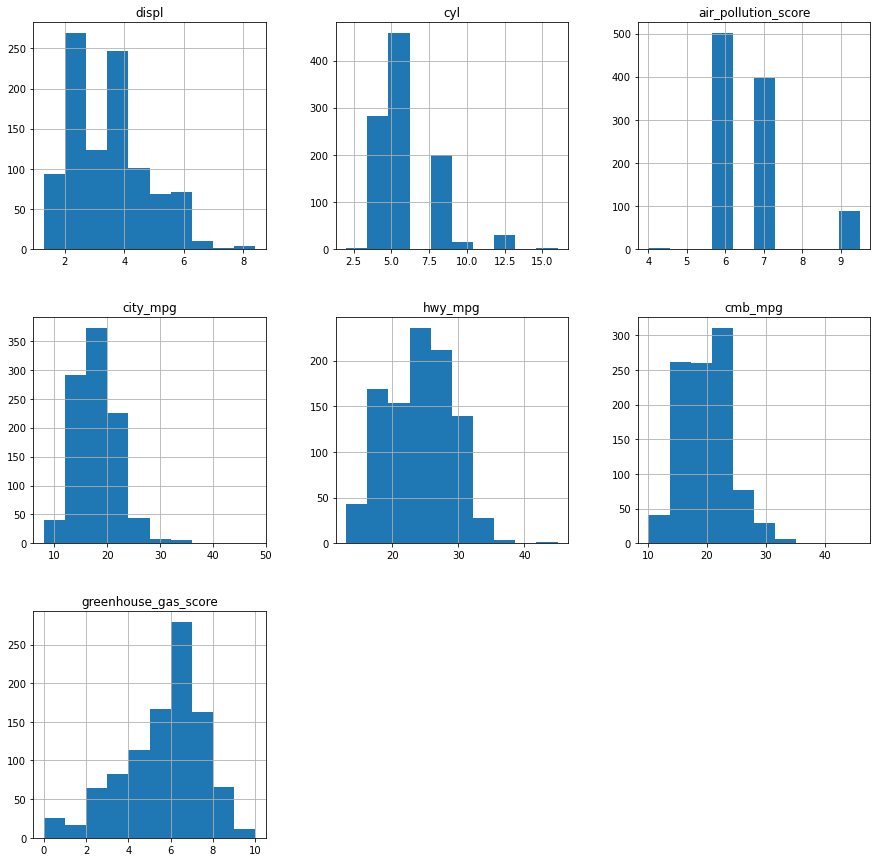

In [100]:
df_08.hist(figsize = (15, 15));

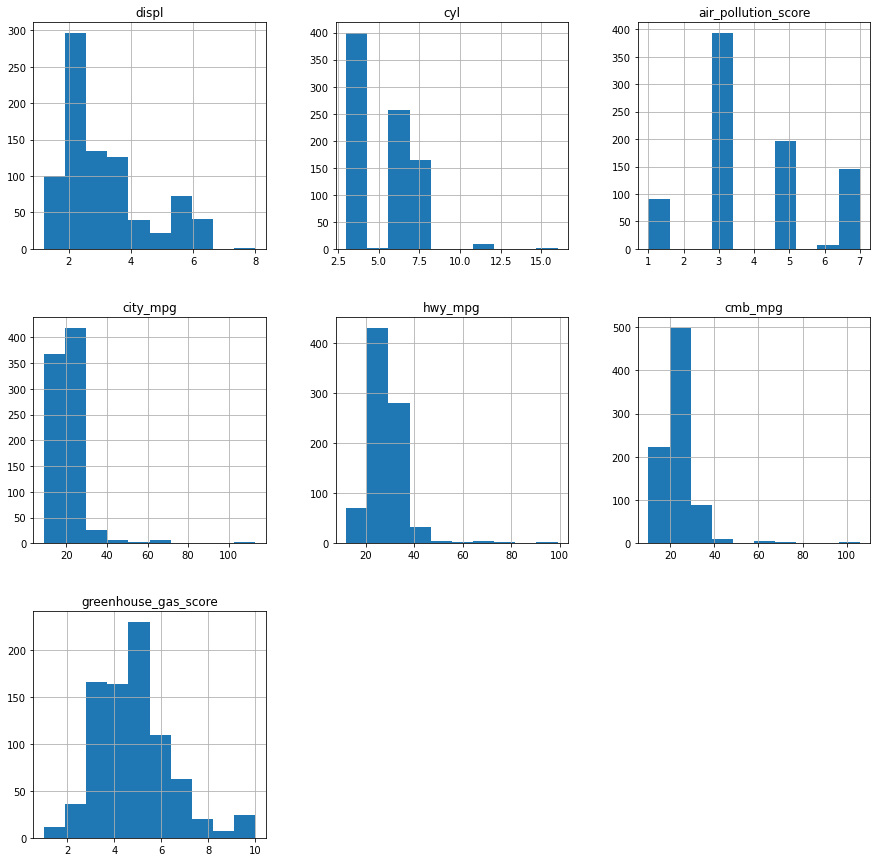

In [101]:
df_18.hist(figsize = (15, 15));

**Compare the distributions of greenhouse gas score in 2008 and 2018.**

>***Distribution for 2008 is more skewed to the left.***

**How has the distribution of combined mpg changed from 2008 to 2018?**
>***Become much more skewed to the right.***

In [102]:
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

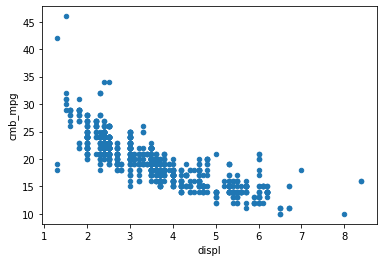

In [103]:
df_08.plot('displ', 'cmb_mpg', kind = 'scatter');

**Describe the correlation between displacement and combined mpg.**
>***Negative Correlation***

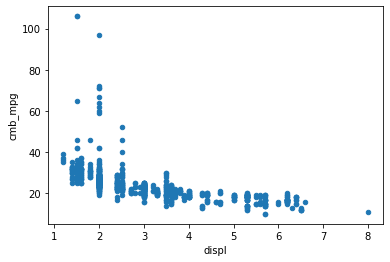

In [104]:
df_18.plot('displ', 'cmb_mpg', kind = 'scatter');

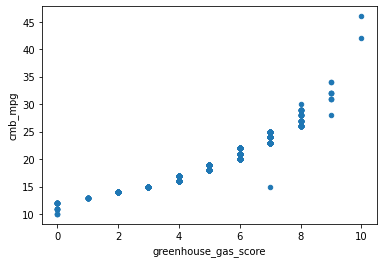

In [105]:
df_08.plot('greenhouse_gas_score', 'cmb_mpg', kind = 'scatter');

**Describe the correlation between greenhouse gas score and combined mpg.**
>***Positive Correlation***

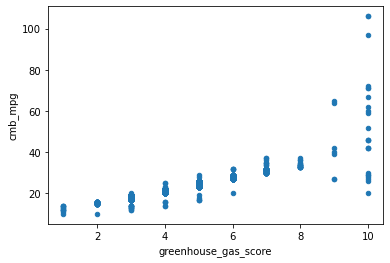

In [106]:
df_18.plot('greenhouse_gas_score', 'cmb_mpg', kind = 'scatter');

***The fuel economy of an automobile is the fuel efficiency relationship between the distance traveled and the amount of fuel consumed by the vehicle. Consumption can be expressed in terms of volume of fuel to travel a distance, or the distance travelled per unit volume of fuel consumed.***



<a id='Conclusions & Visuals'></a>

### Conclusions & Visuals
- **Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?**
- **Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?**
- **Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)**
- **Q4: What features are associated with better fuel economy (mpg)?**

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


## Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
Let's first look at what the sources of fuel are and which ones are alternative sources.

In [109]:
df_08.fuel.value_counts()

Gasoline    984
ethanol       1
CNG           1
gas           1
Name: fuel, dtype: int64

In [110]:
df_18.fuel.value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. (You can use Google if you weren't sure which ones are alternative sources of fuel!)

In [111]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [112]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

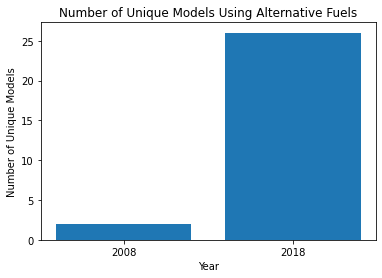

In [113]:
plt.bar(['2008', '2018'], [alt_08, alt_18])
plt.title('Number of Unique Models Using Alternative Fuels')
plt.xlabel('Year')
plt.ylabel('Number of Unique Models')
plt.show()

Since 2008, the number of unique models using alternative sources of fuel increased by 24. We can also look at proportions.

In [114]:
total_unique_08 = df_08.model.nunique()
total_unique_18 = df_18.model.nunique()
total_unique_08, total_unique_18

(377, 357)

In [115]:
prop_08 = alt_08 / total_unique_08
prop_18 = alt_18 / total_unique_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

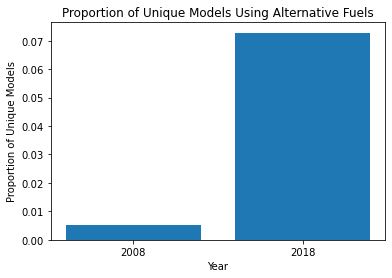

In [116]:
plt.bar(['2008', '2018'], [prop_08, prop_18])
plt.title('Proportion of Unique Models Using Alternative Fuels')
plt.xlabel('Year')
plt.ylabel('Proportion of Unique Models')
plt.show()

## Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?
Let's look at the average fuel economy for each vehicle class for both years.

In [117]:
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [118]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [119]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [120]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

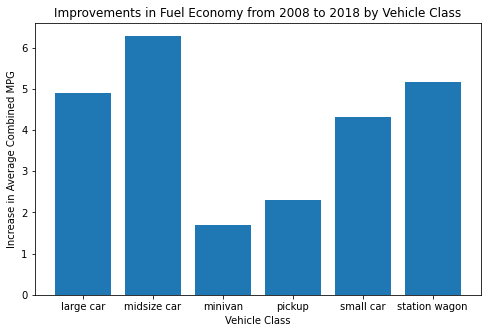

In [121]:
inc.dropna(inplace=True)
plt.subplots(figsize = (8, 5))
plt.bar(inc.index, inc.values)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

# Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)


In [122]:
# smartway labels for 2008
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [123]:
smart_08 = df_08.query('smartway == "yes"')

In [124]:
# explore smartway vehicles in 2008
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [125]:
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [126]:
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [127]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


# Q4: What features are associated with better fuel economy (mpg)?

In [128]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [129]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


# Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?


In [130]:
df_08.rename(columns=lambda x:x[:10] + '_2008', inplace=True)

In [131]:
df_08.columns

Index(['model_2008', 'displ_2008', 'cyl_2008', 'trans_2008', 'drive_2008',
       'fuel_2008', 'veh_class_2008', 'air_pollut_2008', 'city_mpg_2008',
       'hwy_mpg_2008', 'cmb_mpg_2008', 'greenhouse_2008', 'smartway_2008'],
      dtype='object')

In [132]:
# merge datasets
df_combined = df_08.merge(df_18, left_on= 'model_2008', right_on= 'model', how = 'inner')

In [133]:
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [134]:
df_combined.shape

(922, 26)

In [135]:
df_combined.to_csv('combined_dataset.csv', index=False)

<a id='Results with Merged Dataset'></a>

### Results with Merged Dataset
#### Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

In [136]:
df = pd.read_csv('combined_dataset.csv')

In [137]:
df.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [138]:
model_mpg = df.groupby('model')[['cmb_mpg', 'cmb_mpg_2008']].mean()
model_mpg.head()

,cmb_mpg,cmb_mpg_2008
model,,
ACURA RDX,22.500000,19.000000
AUDI A3,28.000000,23.333333
AUDI A4,27.000000,21.000000
AUDI A6,25.666667,19.666667
AUDI A8 L,22.000000,16.500000


In [139]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [140]:
model_mpg.head()

,cmb_mpg,cmb_mpg_2008,mpg_change
model,,,
ACURA RDX,22.500000,19.000000,3.500000
AUDI A3,28.000000,23.333333,4.666667
AUDI A4,27.000000,21.000000,6.000000
AUDI A6,25.666667,19.666667,6.000000
AUDI A8 L,22.000000,16.500000,5.500000


### Find the vehicle that improved the most

In [141]:
idx = model_mpg.mpg_change.idxmax()

In [142]:
idx

'VOLVO XC 90'

In [143]:
model_mpg.loc[idx]

cmb_mpg         32.200000
cmb_mpg_2008    15.666667
mpg_change      16.533333
Name: VOLVO XC 90, dtype: float64